In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

[[112  48  52  52]
 [ 41  82  45  45]]


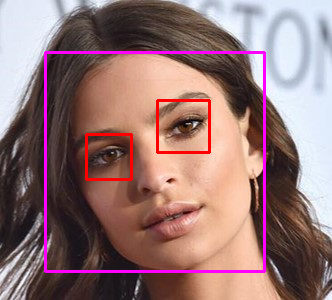

-1

In [5]:
# Creating face_cascade and eye_cascade objects
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

# Loading the image ..
img = cv2.imread("./face.png")

# Converting the image into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Defining and drawing the rectangles around the face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 2)


roi_gray = gray[y:(y+h), x:(x+w)]
roi_color = img[y:(y+h), x:(x+w)]

# eyes
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
print(eyes)
"""
[[ 41  82  45  45]
 [112  48  52  52]]
"""
index = 0

# Creating for loop in order to divide one eye from another
for (ex, ey, ew, eh) in eyes:
    if index == 0:
        eye_1 = (ex, ey, ew, eh)
    elif index == 1:
        eye_2 = (ex, ey, ew, eh)

    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)
    index = index + 1

cv2_imshow(img)
cv2.waitKey(0)
